Notebook for fitting runtime resource estimates for the block encoding circuits only.

Cambridge Consultants 2024\
Walden Killick

The Azure Quantum Resource Estimator faces timeout issues when evaluating the runtime of the full QSVT circuit for large matrices. In this notebook, we evaluate the growth of the runtime of the **block-encoding** circuits *only*, which are much smaller than the full QSVT circuits but are known to have the same asymptotic growth with the input size $N$.

In [31]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [32]:
# Data from the resource estimator
x_matrix_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
y_runtimes = [
    4.752e-5, 3.0368e-3, 1.13048e-2, 3.174e-2, 9.3072e-2, 1.9656e-1, 3.967936e-1, 6.533032e-1,
    1.0631256, 1.5709088, 2.4931116, 3.5833392
    ]

In [33]:
def polylog(t: float, a: float, b: float, c: float, d: float) -> float:
    """Compute the value of a*log(t)^3 + b*log(t)^2 + c*log(t) + d.

    Parameters
    ----------
    t : float
        Argument for the logarithms.
    a : float
        log(t)^3 coefficient.
    b : float
        log(t)^2 coefficient.
    c : float
        log(t) coefficient.
    d : float
        Constant.

    Returns
    -------
    float
        Value of the polylogarithmic function.
    """
    return a*np.log(t)**3 + b*np.log(t)**2 + c*np.log(t) + d

popt, pcov = scipy.optimize.curve_fit(
    lambda t,a,b,c,d: polylog(t,a,b,c,d),  x_matrix_sizes,  y_runtimes,  p0=(0.1,0,0,-1)
    )
print(f"Polylog fit: {popt[0]}*log(x)^3 + {popt[1]}*log(x)^2 + {popt[2]}*log(x) + {popt[3]}")

Polylog fit: 0.01563065492968213*log(x)^3 + -0.13978371754640284*log(x)^2 + 0.42895045072497956*log(x) + -0.40226317623470015


In [34]:
x = np.linspace(4, 8192, 100)
y_polylog_fit = [polylog(t, *popt) for t in x]

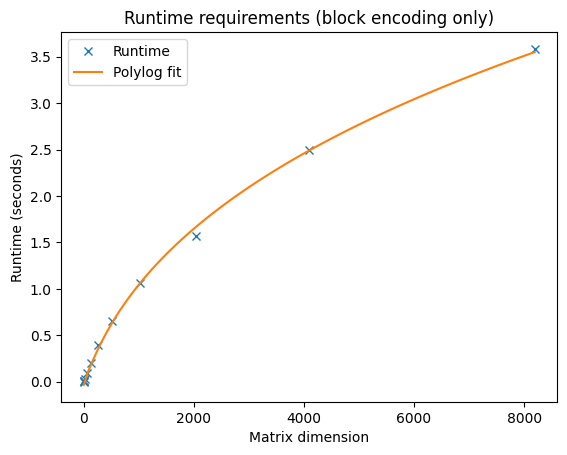

In [35]:
plt.plot(x_matrix_sizes, y_runtimes, 'x', label='Runtime')
plt.plot(x, y_polylog_fit, label='Polylog fit')
plt.xlabel('Matrix dimension')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime requirements (block encoding only)')
plt.legend()
plt.show()